In [29]:
import pandas as pd
from pathlib import Path

base_dir = Path.cwd().parent
data_dir = base_dir / "data"
training_dir = data_dir / "pendigits.tra"
test_dir = data_dir / "pendigits.tes"

training = pd.read_csv(training_dir, header = None)
training_X = training.iloc[:, :16].values
training_X_paths = training_X.reshape(-1, 8, 2)
training_y = training.iloc[:, 16].values

In [31]:
training_X_paths[0]

array([[ 47, 100],
       [ 27,  81],
       [ 57,  37],
       [ 26,   0],
       [  0,  23],
       [ 56,  53],
       [100,  90],
       [ 40,  98]])

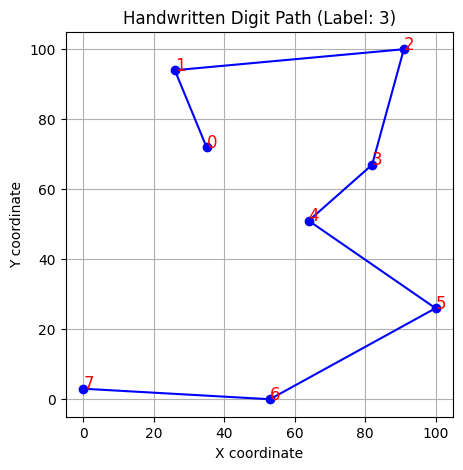

In [44]:
import matplotlib.pyplot as plt

choice = 2600
digit_path = training_X_paths[choice]

plt.figure(figsize=(5, 5))

plt.plot(digit_path[:, 0], digit_path[:, 1], marker='o', linestyle='-', color='b')

for i, (x, y) in enumerate(digit_path):
    plt.text(x, y, str(i), fontsize=12, color='red')

plt.title(f"Handwritten Digit Path (Label: {training_y[choice]})")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")

plt.grid(True)
plt.show()

In [1]:
from main import main

training_x_paths, training_y, test_x_paths, test_y, training_sig, test_sig, forest = main(level = 4, n_estimators= 250)

0.9759862778730704


In [2]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

choice = 5000
path_3d = training_x_paths[choice]
label = training_y[choice]

fig = plt.figure(figsize=(12, 12))

t, x, y = path_3d[:, 0], path_3d[:, 1], path_3d[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=t, y=x, z=y,
    mode='lines+markers',
    marker=dict(size=4, color=t, colorscale='Viridis', opacity=0.8),
    line=dict(color='darkblue', width=4),
)])

fig.update_layout(
    title=f"Interactive 3D Digit Trajectory (Label: {training_y[choice]})",
    scene=dict(
        camera=dict(
            eye=dict(x=3.0, y=0, z=0.75)
        ),
        xaxis_title='Time (t)',
        yaxis_title='X Coordinate',
        zaxis_title='Y Coordinate',
        zaxis=dict(autorange="reversed")

    )
)

fig.show()


<Figure size 1200x1200 with 0 Axes>